# 급여 수준이 높은 자치구는 반려동물을 많이 키울까?

In [15]:
import pandas as pd
from database.Database import Database

* 월평균소득통계 데이터 불러오기

In [16]:
salary_df = pd.read_excel("../data/montly_salary.xlsx", sheet_name="(1)", usecols="A, E, F", header=9)
salary_df.head()

,Unnamed: 0,인원.1,금액.1
0,NaN,Taxpayers,Amount
1,구분 Classification,(2),NaN
2,전국,20795349,903383856
3,서울,4074222,206154609
4,강남구,238504,20320151


* 컬럼명 재정의

In [17]:
salary_df.rename(columns={"Unnamed: 0":"자치구", "인원.1":"인구", "금액.1":"총급여"}, inplace=True)
salary_df

,자치구,인구,총급여
0,NaN,Taxpayers,Amount
1,구분 Classification,(2),NaN
2,전국,20795349,903383856
3,서울,4074222,206154609
4,강남구,238504,20320151
5,강동구,202336,9636540
6,강북구,105168,3552047
7,강서구,254704,11115420
8,관악구,230093,8453248
9,광진구,153095,6787398


* 필요없는 행 삭제

In [18]:
salary_df = salary_df.drop(salary_df.index[29:43])
salary_df

,자치구,인구,총급여
0,NaN,Taxpayers,Amount
1,구분 Classification,(2),NaN
2,전국,20795349,903383856
3,서울,4074222,206154609
4,강남구,238504,20320151
5,강동구,202336,9636540
6,강북구,105168,3552047
7,강서구,254704,11115420
8,관악구,230093,8453248
9,광진구,153095,6787398


In [19]:
salary_df = salary_df.drop(salary_df.index[0:4])
salary_df

,자치구,인구,총급여
4,강남구,238504,20320151
5,강동구,202336,9636540
6,강북구,105168,3552047
7,강서구,254704,11115420
8,관악구,230093,8453248
9,광진구,153095,6787398
10,구로구,179213,7289485
11,금천구,106095,3763785
12,노원구,197526,8435368
13,도봉구,118976,4316725


In [20]:
salary_df.reset_index(drop=True, inplace=True)
salary_df.head()

,자치구,인구,총급여
0,강남구,238504,20320151
1,강동구,202336,9636540
2,강북구,105168,3552047
3,강서구,254704,11115420
4,관악구,230093,8453248


In [21]:
salary_df["자치구"] = salary_df["자치구"].replace("[^가-힣]", "", regex=True)
salary_df.head()

,자치구,인구,총급여
0,강남구,238504,20320151
1,강동구,202336,9636540
2,강북구,105168,3552047
3,강서구,254704,11115420
4,관악구,230093,8453248


In [38]:
salary_df["인구"] = salary_df["인구"].astype(int)
salary_df["총급여"] = salary_df["총급여"].astype(int)
salary_df["월평균소득"] = salary_df["총급여"] / salary_df["인구"] / 12 * 1000000
salary_df.head()

,자치구,인구,총급여,월평균소득
0,강남구,238504,20320151,7.099864e+06
1,강동구,202336,9636540,3.968869e+06
2,강북구,105168,3552047,2.814582e+06
3,강서구,254704,11115420,3.636712e+06
4,관악구,230093,8453248,3.061533e+06


In [40]:
salary_df["월평균소득"] = salary_df["월평균소득"].astype(int)
salary_df.head()

,자치구,인구,총급여,월평균소득
0,강남구,238504,20320151,7099863
1,강동구,202336,9636540,3968868
2,강북구,105168,3552047,2814581
3,강서구,254704,11115420,3636711
4,관악구,230093,8453248,3061533


In [ ]:
salary_df

In [16]:
conn = Database(
    "database-2.c3iym8yog7ht.ap-northeast-2.rds.amazonaws.com",
    "3306",
    "pethub",
    "addinedu5",
    "pethub"
)

In [47]:
for _, row in salary_df.iterrows():
    try:
        query = "select id from region_list where region_id = %s"
        region_id = conn.selectData(query, (row["자치구"],))

        query = "insert into region_salary values(%s, %s, %s)"
        conn.insertData(query, (region_id, row["인구"], row["월평균소득"]))
    except Exception as e:
        print(e)
        conn.rollback()
        break

In [11]:
result = conn.selectData("select * from region_salary limit 3")
for row in result:
    print(result)

[(23, 238504, 7099863), (25, 202336, 3968868), (9, 105168, 2814581)]
[(23, 238504, 7099863), (25, 202336, 3968868), (9, 105168, 2814581)]
[(23, 238504, 7099863), (25, 202336, 3968868), (9, 105168, 2814581)]


## 서울시 자치구별 급여수준 불러오기

In [68]:
query = """
select rl.region, rs.population, rs.salary 
from region_salary rs, region_list rl 
where rs.region_id = rl.id 
group by rl.region
"""
result = conn.selectData(query)

region = []
salary = []
population = []
for row in result:
    region.append(row[0])
    population.append(row[1])
    salary.append(row[2])

region_salary = pd.DataFrame({"자치구":region, "인구수":population, "월평균소득":salary})
region_salary.sort_values(by="월평균소득", ascending=False, inplace=True)
region_salary["월평균소득"] = region_salary["월평균소득"] / 10000
region_salary.head()

,자치구,인구수,월평균소득
14,서초구,177147,716.5255
0,강남구,238504,709.9863
20,용산구,93602,651.1109
17,송파구,298078,492.2586
15,성동구,120927,468.0502


* 과연 월소득 수준이 높은 자치구는 어디일까?

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

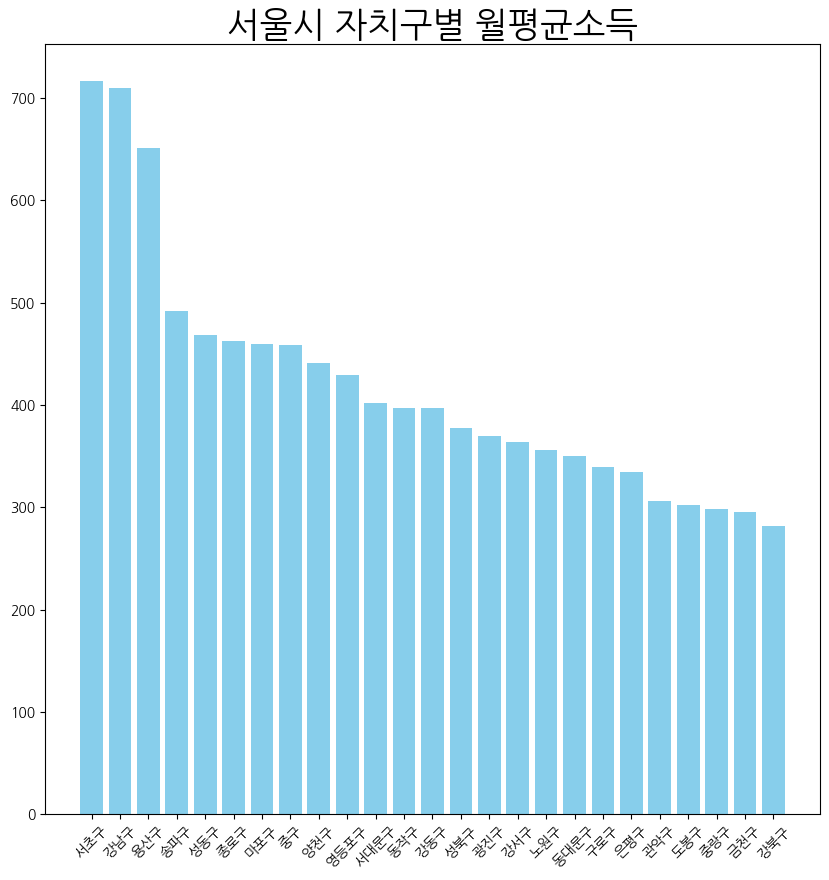

In [84]:
plt.figure(figsize=(10, 10))
plt.bar(region_salary["자치구"], region_salary["월평균소득"], color="skyblue")
plt.title("서울시 자치구별 월평균소득", fontsize=25)
plt.xticks(rotation=45)
plt.show()

## 서울시 자치구별 반려동물 등록 현황
* 자치구별 등록수 불러오기

In [20]:
query = """
select rl.region, sum(rpr.count) 
from region_list rl, region_pet_regist rpr 
where rl.id = rpr.region_id 
group by rl.region
"""
result = conn.selectData(query)
region_pet_regist = pd.DataFrame(result, columns=["자치구", "등록수"])
region_pet_regist.head()

,자치구,등록수
0,종로구,10251
1,중구,8600
2,용산구,18676
3,성동구,18346
4,광진구,21875


In [60]:
region_pet_regist["등록수"] = region_pet_regist["등록수"].astype("int")
region_pet_regist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   자치구     25 non-null     object
 1   등록수     25 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 532.0+ bytes


* 월평군소득과 등록현황 데이터프레임 합치기

In [61]:
merge_df = pd.merge(region_salary, region_pet_regist, on="자치구")
merge_df = merge_df[["자치구", "월평균소득", "등록수"]]
merge_df["등록수"] = merge_df["등록수"].astype("int")
merge_df.set_index("자치구", inplace=True)

* 월평균소득과 반려동물 등록수의 상관계수를 수치와 그래프로 확인

In [62]:
merge_df.corr()

,월평균소득,등록수
월평균소득,1.000000,0.140845
등록수,0.140845,1.000000


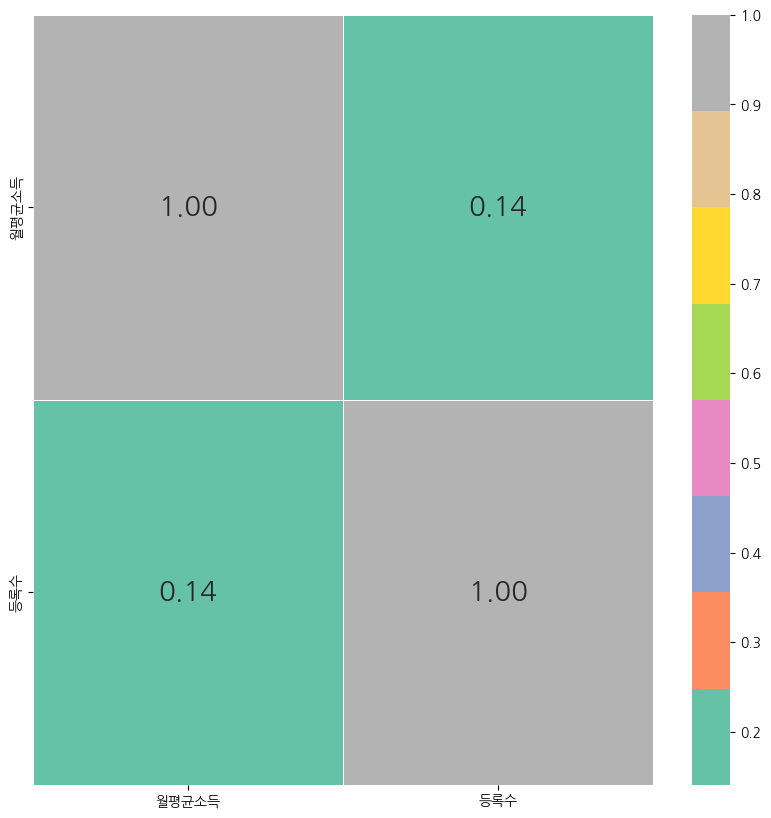

In [63]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=merge_df.corr(), annot=True, fmt=".2f", linewidths=.5, cmap="Set2", annot_kws={"size": 20})
plt.show()

* 소득대비 등록 비율을 구해준다.

In [64]:
merge_df["소득대비비율"] = merge_df["등록수"] / merge_df["월평균소득"] * 100
merge_df = merge_df.sort_values(by="소득대비비율", ascending=False)

* 자치구별 소득대비 등록 비율을 산점도 그래프로 보자. 과연 어느 자치구가 소득대비 반려동물을 많이 키울까?

/var/folders/xd/lnws2p7n09g3nz97545v38d80000gn/T/ipykernel_7930/1758367485.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(merge_df["월평균소득"][i] * 0.97,
/var/folders/xd/lnws2p7n09g3nz97545v38d80000gn/T/ipykernel_7930/1758367485.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  merge_df["등록수"][i] * 0.95,


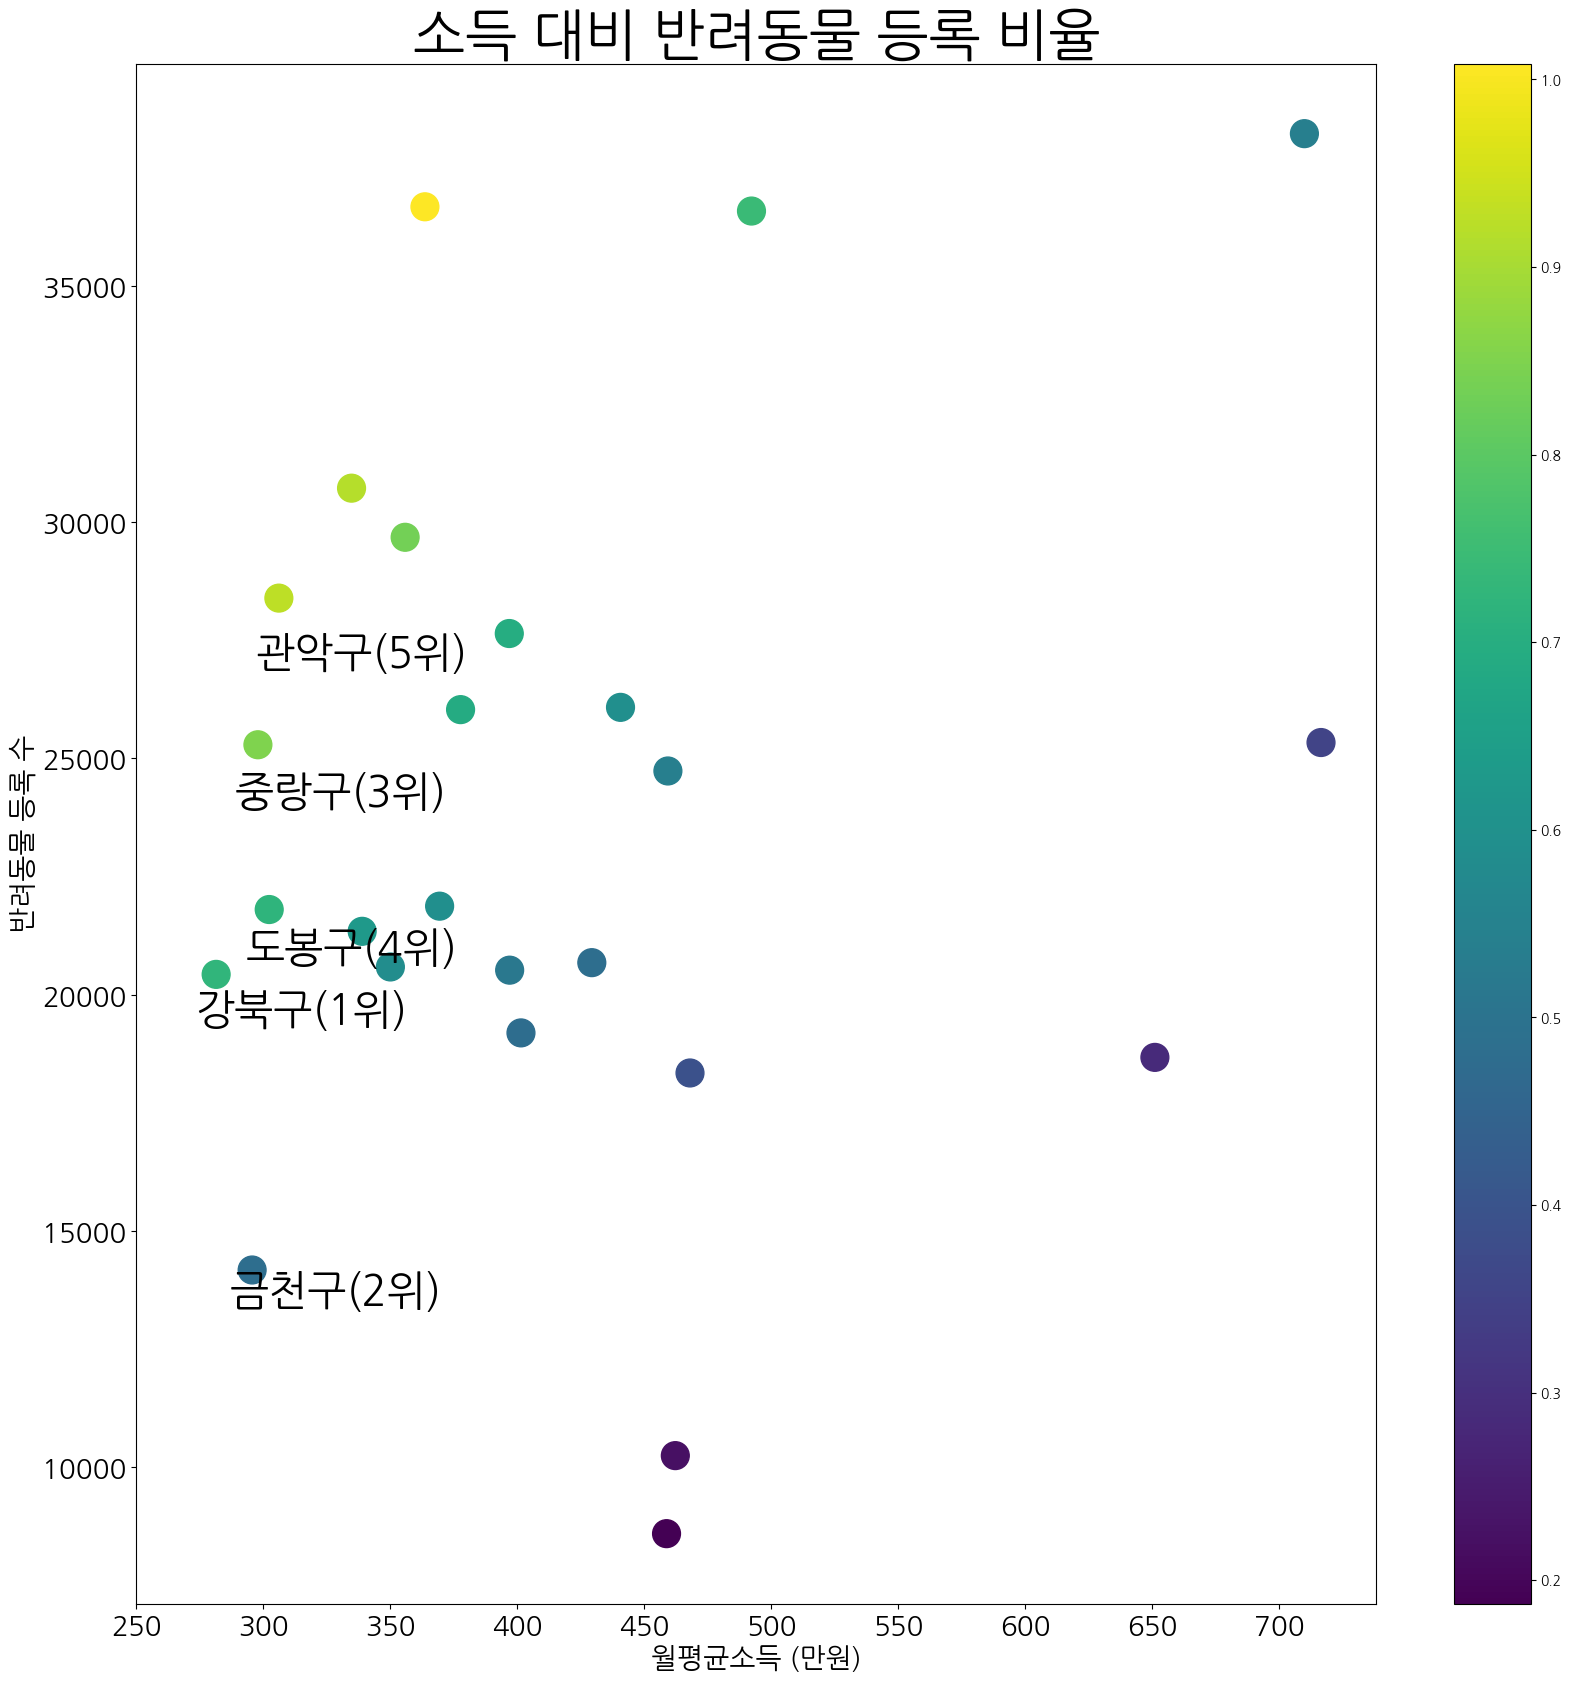

In [82]:
plt.figure(figsize=(20, 20))
plt.scatter(merge_df["월평균소득"], merge_df["등록수"], c=merge_df["소득대비비율"],
            s=400)

plt.xticks(ticks=[row for row in range(2500000, 7500000, 500000)],
           labels=[str(row) for row in range(250, 750, 50)])

for i in range(5):
    plt.text(merge_df["월평균소득"][i] * 0.97,
             merge_df["등록수"][i] * 0.95,
             merge_df.index[i] + "(" + str(i+1) + "위)", fontsize=30)

plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)

plt.title('소득 대비 반려동물 등록 비율', fontsize=40)
plt.xlabel('월평균소득 (만원)', fontsize=20)
plt.ylabel('반려동물 등록 수', fontsize=20)
plt.colorbar()
plt.show()

* 반대로 소득대비 반려동물 등록수가 낮은 자치구는 어디일까?

/var/folders/xd/lnws2p7n09g3nz97545v38d80000gn/T/ipykernel_7930/2914305328.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(merge_df["월평균소득"][i] * 0.97,
/var/folders/xd/lnws2p7n09g3nz97545v38d80000gn/T/ipykernel_7930/2914305328.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  merge_df["등록수"][i] * 0.95,


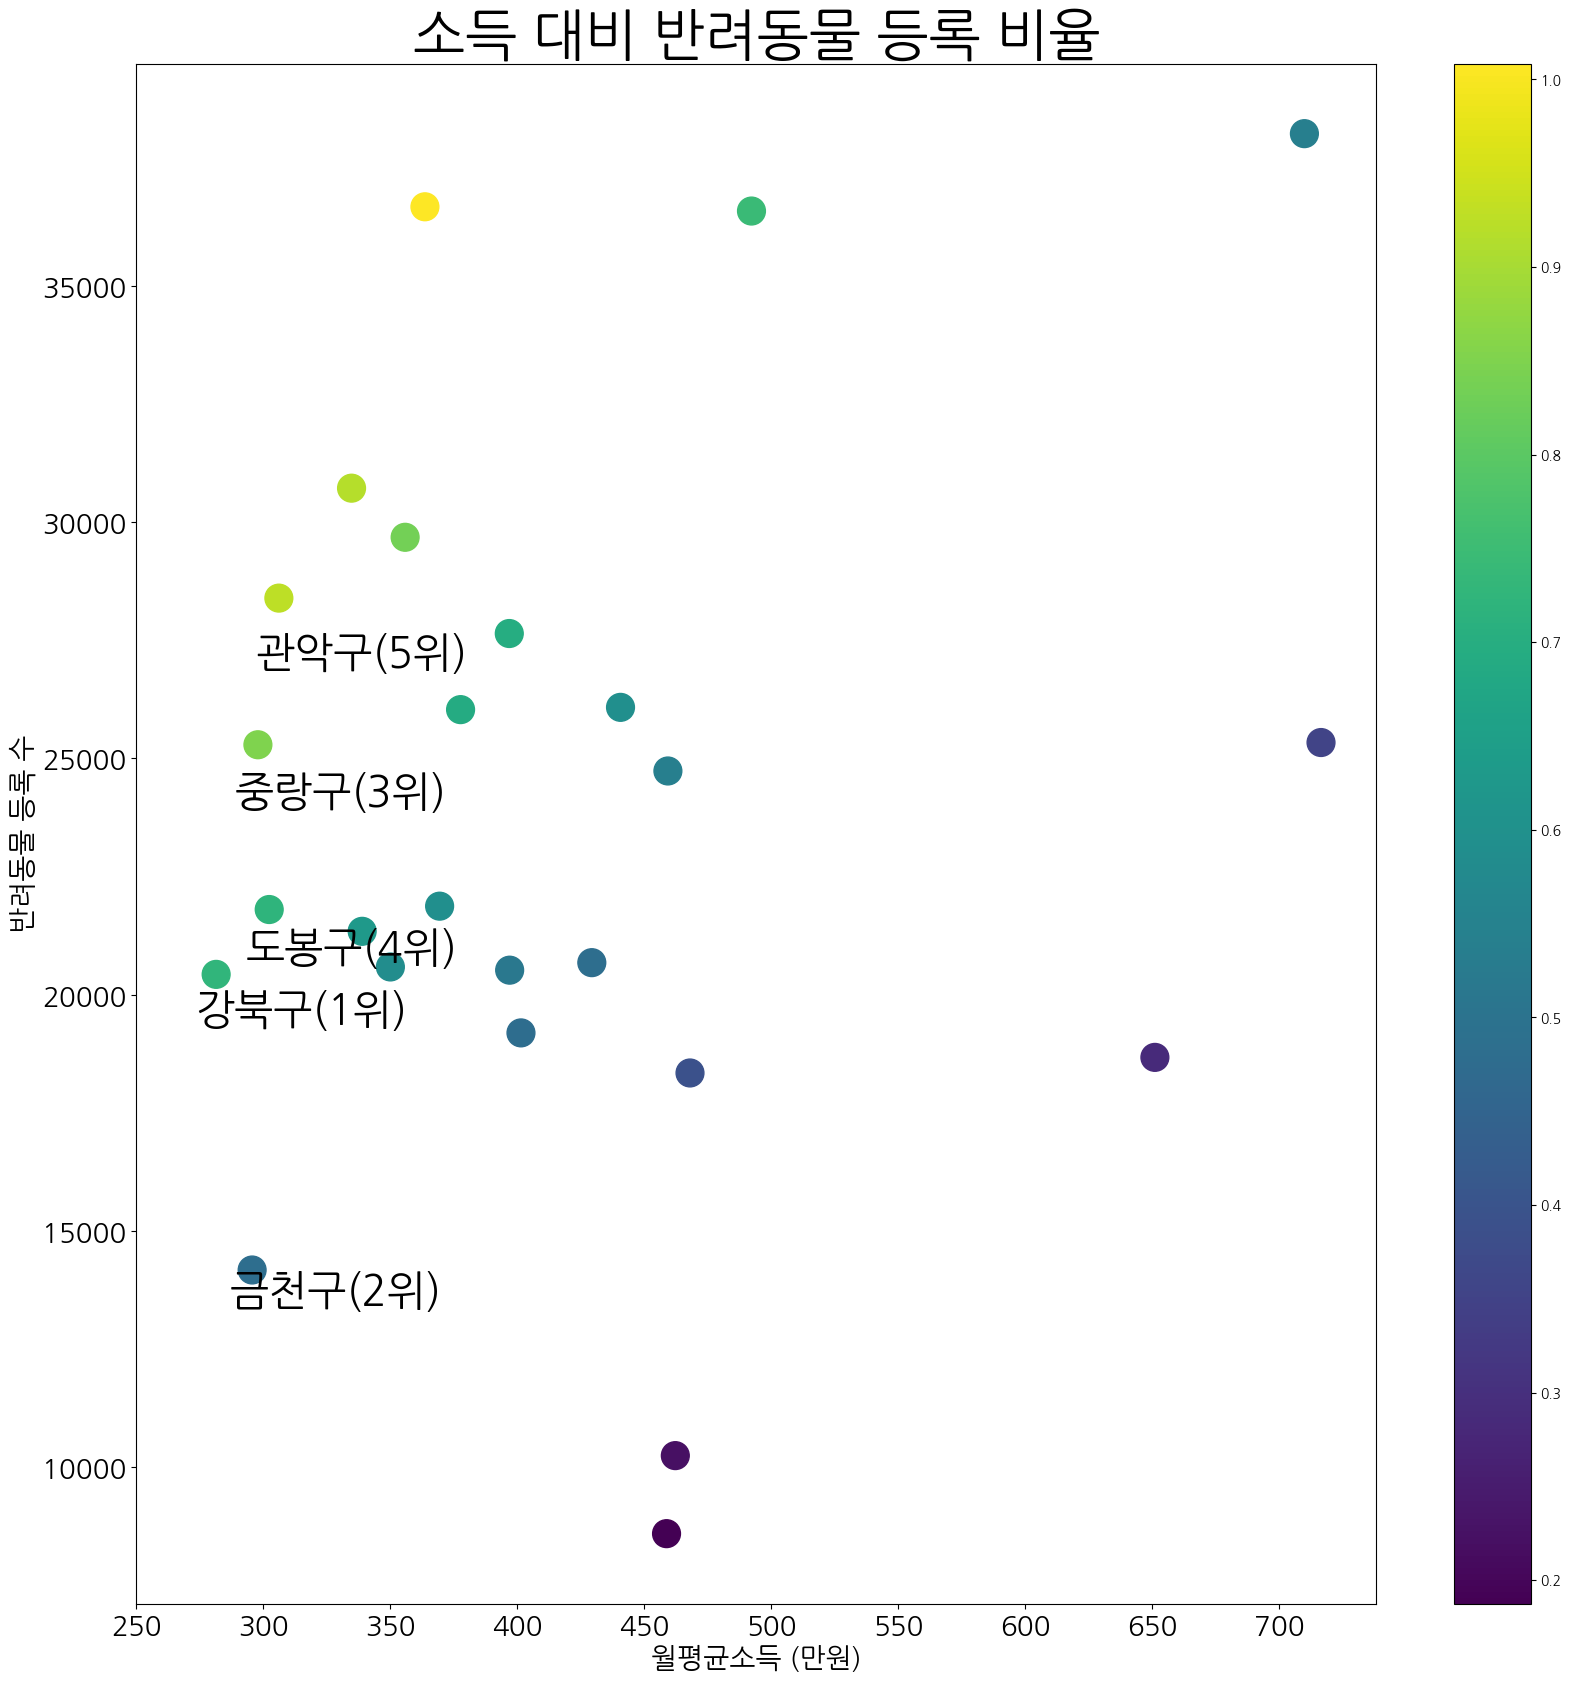

In [80]:
merge_df.sort_values(by="월평균소득", ascending=True, inplace=True)

plt.figure(figsize=(20, 20))
plt.scatter(merge_df["월평균소득"], merge_df["등록수"], c=merge_df["소득대비비율"],
            s=400)

plt.xticks(ticks=[row for row in range(2500000, 7500000, 500000)],
           labels=[str(row) for row in range(250, 750, 50)])

for i in range(5):
    plt.text(merge_df["월평균소득"][i] * 0.97,
             merge_df["등록수"][i] * 0.95,
             merge_df.index[i] + "(" + str(i+1) + "위)", fontsize=30)

plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)

plt.title('소득 대비 반려동물 등록 비율', fontsize=40)
plt.xlabel('월평균소득 (만원)', fontsize=20)
plt.ylabel('반려동물 등록 수', fontsize=20)
plt.colorbar()
plt.show()

* 소득 상위 5개 자치구는 반려동물을 키우는 비율이 어떻게 될까?

In [92]:
top5 = merge_df.sort_values(by="월평균소득", ascending=False).head()
top5.reset_index(inplace=True)

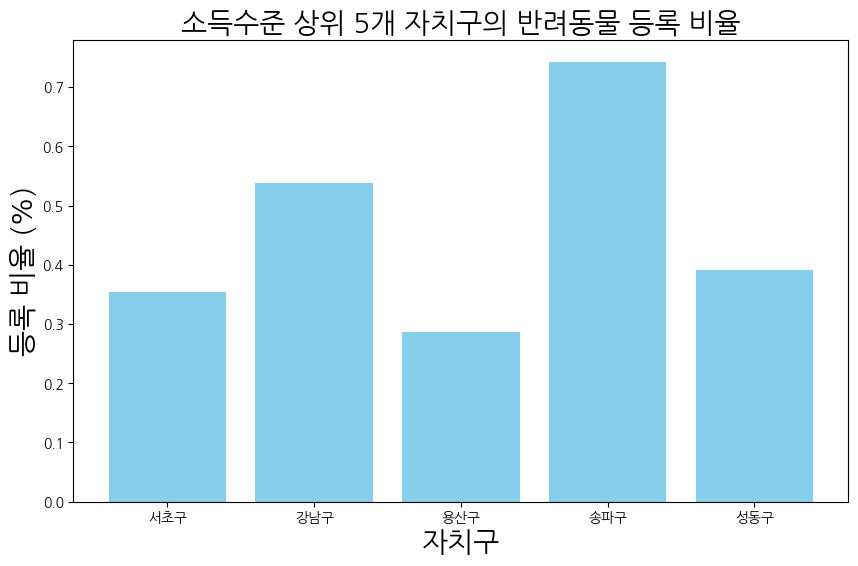

In [99]:
plt.figure(figsize=(10, 6))
plt.bar(top5['자치구'], top5['소득대비비율'], color='skyblue')
plt.title('소득수준 상위 5개 자치구의 반려동물 등록 비율', fontsize=20)
plt.xlabel('자치구', fontsize=20)
plt.ylabel('등록 비율 (%)', fontsize=20)
plt.show()